# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
def information(data):
    print(data.head())
    print('Количество пропусков:')
    print(data.isna().sum())
    print('Количество дубликатов:')
    print(data.duplicated().sum())
    print('Количество уникальных записей:', data['id'].nunique())
    print('Коэффициент корреляции Пирсона:')
    print(data.loc[:, ['f0','f1','f2']].corr())
    data.info()

In [4]:
k = 0
for data in [data_0, data_1, data_2]:
    print('Регион', k)
    information(data)
    print()
    k += 1

Регион 0
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
Количество пропусков:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Количество дубликатов:
0
Количество уникальных записей: 99990
Коэффициент корреляции Пирсона:
          f0        f1        f2
f0  1.000000 -0.440723 -0.003153
f1 -0.440723  1.000000  0.001724
f2 -0.003153  0.001724  1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  10

In [5]:
data_0 = data_0.drop_duplicates(['id']).reset_index(drop=True)
data_1 = data_1.drop_duplicates(['id']).reset_index(drop=True)
data_2 = data_2.drop_duplicates(['id']).reset_index(drop=True)
print(len(data_0), len(data_1), len(data_2))

99990 99996 99996


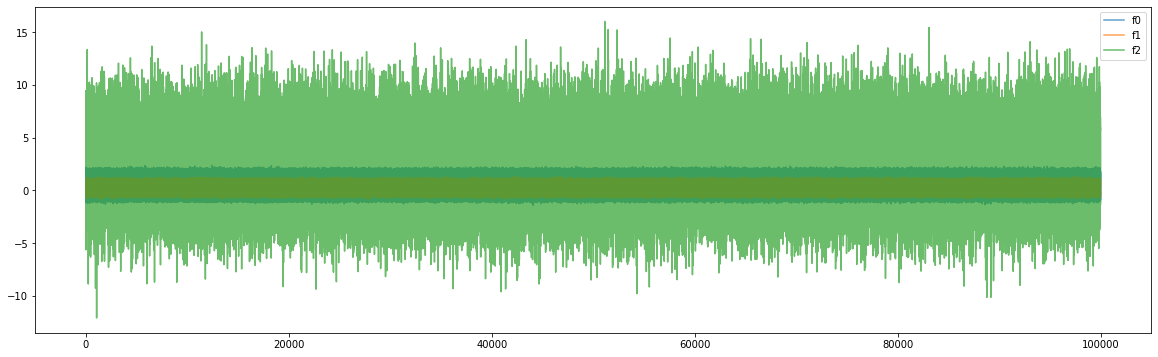

In [6]:
data_0.plot(y=['f0','f1','f2'], figsize=(20,6), alpha=0.7);


Значения признака f0 распределены примерно от 0 до 1, f1 от -1 до 2 и f2 от -6 до 11

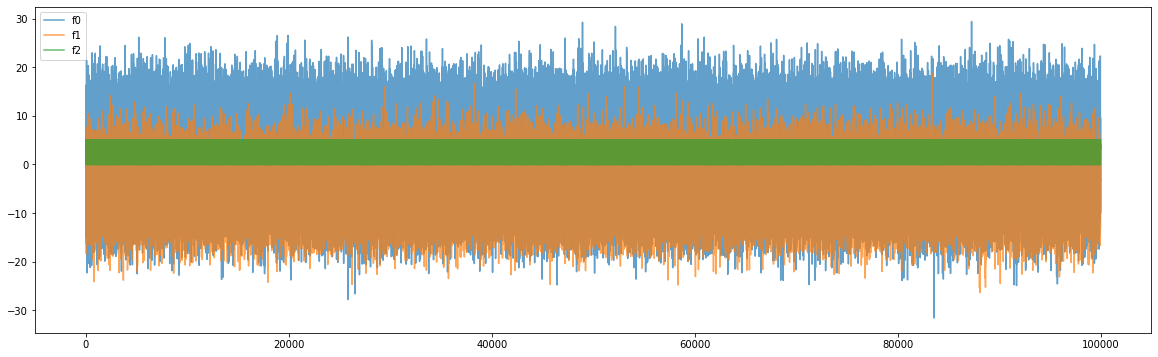

In [7]:
data_1.plot(y=['f0','f1','f2'], figsize=(20,6), alpha=0.7);

Значения признака f0 распределены примерно от -20 до 20, f1 от -17 до 10 и f2 от 0 до 5

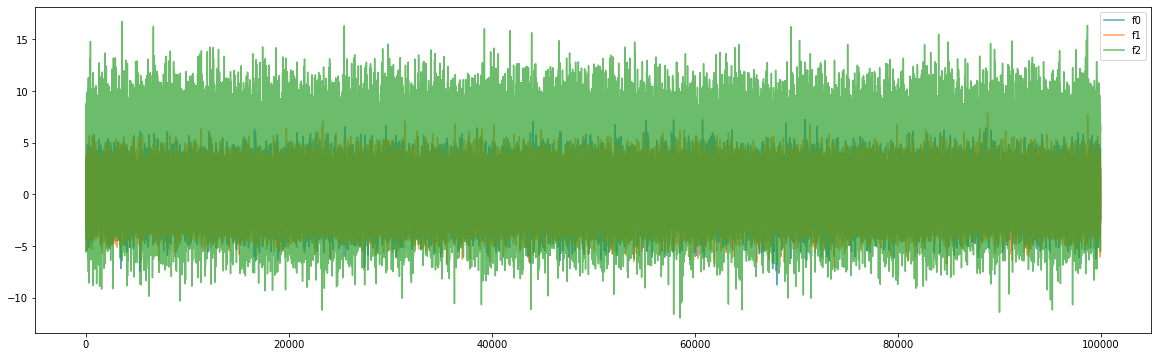

In [8]:
data_2.plot(y=['f0','f1','f2'], figsize=(20,6), alpha=0.7);

Значения признака f0 распределены примерно от -5 до 5, f1 от -5 до 5 и f2 от -6 до 11

Пропусков в данных нет, были незначительные дубликаты, которые я удалила.

Нам предоставлены таблицы с данными по трем регионам. В данных пропусков нет, типы данных корректные, мультиколлинеарность не выявлена, можно приступать к обучению и проверке модели.

## Обучение и проверка модели

In [9]:
features = data_0.drop(['product', 'id'], axis=1)
target = data_0['product']

print('Регион 0:')
print()

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
model = LinearRegression()
model.fit(features_train_0, target_train_0)
predictions_valid_0 = model.predict(features_valid_0)
    
print('Средний запас предсказанного сырья =', predictions_valid_0.mean())
print('RMSE =', mean_squared_error(target_valid_0, predictions_valid_0) ** 0.5)

Регион 0:

Средний запас предсказанного сырья = 92.78915638280621
RMSE = 37.853527328872964


In [10]:
features = data_1.drop(['product', 'id'], axis=1)
target = data_1['product']

print('Регион 1:')
print()

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
model = LinearRegression()
model.fit(features_train_1, target_train_1)
predictions_valid_1 = model.predict(features_valid_1)
    
print('Средний запас предсказанного сырья =', predictions_valid_1.mean())
print('RMSE =', mean_squared_error(target_valid_1, predictions_valid_1) ** 0.5)

Регион 1:

Средний запас предсказанного сырья = 69.17831957030432
RMSE = 0.892059264771703


In [11]:
features = data_2.drop(['product', 'id'], axis=1)
target = data_2['product']

print('Регион 2:')
print()

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
model = LinearRegression()
model.fit(features_train_2, target_train_2)
predictions_valid_2 = model.predict(features_valid_2)
    
print('Средний запас предсказанного сырья =', predictions_valid_2.mean())
print('RMSE =', mean_squared_error(target_valid_2, predictions_valid_2) ** 0.5)

Регион 2:

Средний запас предсказанного сырья = 94.86572480562035
RMSE = 40.07585073246016


Средний запас предсказанного сырья в 0 регионе = 92.59, в 1 = 68.72 и во 2 = 94.96. В регионе 2 средний запас больше всех, поэтому пока что кажется, он лучше всего подходит для разработки.

Качество модели лучше всего в 1 регионе, в остальных rmse высоковата

## Подготовка к расчёту прибыли

In [12]:
Points = 500
Best_Points = 200
Budget = 10000000
Cost_One_Barrel = 450
Enough_Materials = Budget / (Cost_One_Barrel * Best_Points)
print('Достаточный объем сырья новой скважины =', Enough_Materials)

Достаточный объем сырья новой скважины = 111.11111111111111


In [13]:
print('Средний запас в регионе 0 =', data_0['product'].mean())
print('Средний запас в регионе 1 =', data_1['product'].mean())
print('Средний запас в регионе 2 =', data_2['product'].mean())

Средний запас в регионе 0 = 92.49968421774354
Средний запас в регионе 1 = 68.82391591804064
Средний запас в регионе 2 = 94.99834211933378


В каждом регионе средний запас меньше достаточного объема сырья для безубыточной разработки.

## Расчёт прибыли и рисков 

In [14]:
max_predictions_0 = pd.Series(predictions_valid_0, index=features_valid_0.index).sort_values(ascending=False).head(200)
max_predictions_1 = pd.Series(predictions_valid_1, index=features_valid_1.index).sort_values(ascending=False).head(200)
max_predictions_2 = pd.Series(predictions_valid_2, index=features_valid_2.index).sort_values(ascending=False).head(200)

In [15]:
profit_0 = max_predictions_0.sum() * Cost_One_Barrel - Budget
profit_1 = max_predictions_1.sum() * Cost_One_Barrel - Budget
profit_2 = max_predictions_2.sum() * Cost_One_Barrel - Budget

In [16]:
print('Прибыль в регионе 0 =', profit_0)
print('Прибыль в регионе 1 =', profit_1)
print('Прибыль в регионе 2 =', profit_2)

Прибыль в регионе 0 = 3981630.9105223548
Прибыль в регионе 1 = 2486060.78512663
Прибыль в регионе 2 = 3362914.907793103


In [42]:
def profit(target_valid, predictions_valid):
    state = np.random.RandomState(12345)
    values = []

    for i in range(1000):
        subsample = predictions_valid.sample(n=500, replace=True, random_state=state)
        subsample = subsample.sort_values(ascending=False)
        subsample_target = target_valid[subsample.index].head(200)
        values.append(sum(subsample_target) * Cost_One_Barrel - Budget)
    values = pd.Series(values)
    print('Средняя прибыль =', values.mean())
    print(f'Доверительный интервал: [{values.quantile(.025):.7}; {values.quantile(.975):.7}]')
    print('Риски:', values[values < 0].count() / 1000)

In [43]:
target_valid_0.sort_values(ascending=False).head()

45257    185.338370
31005    185.299685
77710    185.289402
83956    185.264218
12299    185.257601
Name: product, dtype: float64

In [44]:
target_list = [target_valid_0, target_valid_1, target_valid_2]
predictions_list = [pd.Series(predictions_valid_0, index=features_valid_0.index),
                    pd.Series(predictions_valid_1, index=features_valid_1.index),
                    pd.Series(predictions_valid_2, index=features_valid_2.index)]
k = 0
for target, predictions in zip(target_list, predictions_list):
    print('Регион', k)
    print()
    profit(target, predictions)
    print()
    k += 1

Регион 0

Средняя прибыль = 380613.47001759824
Доверительный интервал: [-142942.7; 890976.8]
Риски: 0.077

Регион 1

Средняя прибыль = 478484.93959210324
Доверительный интервал: [89525.12; 866604.7]
Риски: 0.012

Регион 2

Средняя прибыль = 330546.25801736023
Доверительный интервал: [-190365.7; 840467.4]
Риски: 0.113



Для разработки скважин я предлагаю выбрать регион 1, так как его средняя прибыль = 478484.93 тыс. рублей с рисками 1,2%. В регионе 0 прибыль меньше - 380613.47, но риски также невелики - 7,7%, а во втором регионе риски составляют 11,3% и прибыль самая наименьшая 330546.25 тыс. рублей, поэтому данный регион не советую для разработки.